# **Sales Demand Forecasting and Inventory Management**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [57]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
path='/content/drive/MyDrive/TrainData.csv'
df=pd.read_csv(path)
display(df.head(),df.tail())

,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10


,date,store,item,sales
912995,27-12-2017,10,50,63
912996,28-12-2017,10,50,59
912997,29-12-2017,10,50,74
912998,30-12-2017,10,50,62
912999,31-12-2017,10,50,82


In [5]:
# we have data for 5 years for 10 stores and 50 products
df.shape

(913000, 4)

In [6]:
df.info() # which col contains which type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
# check for null values
df.isnull().sum()

,0
date,0
store,0
item,0
sales,0


In [8]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [9]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["year"]= parts[2].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[0].astype('int')
df.head()

,date,store,item,sales,year,month,day
0,01-01-2013,1,1,13,2013,1,1
1,02-01-2013,1,1,11,2013,1,2
2,03-01-2013,1,1,14,2013,1,3
3,04-01-2013,1,1,13,2013,1,4
4,05-01-2013,1,1,10,2013,1,5


In [10]:
# whether its a weekend or a weekday

from datetime import datetime
import calendar

def weekend_or_weekday(year,month,day):
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0

df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()


,date,store,item,sales,year,month,day,weekend
0,01-01-2013,1,1,13,2013,1,1,0
1,02-01-2013,1,1,11,2013,1,2,0
2,03-01-2013,1,1,14,2013,1,3,0
3,04-01-2013,1,1,13,2013,1,4,0
4,05-01-2013,1,1,10,2013,1,5,1


In [11]:
# whether there was any holiday on a particular day or not

from datetime import date
import holidays

def is_holiday(x):

  india_holidays = holidays.country_holidays('IN')

  if india_holidays.get(x):
    return 1
  else:
    return 0

df['holidays'] = df['date'].apply(is_holiday)
df.head()

,date,store,item,sales,year,month,day,weekend,holidays
0,01-01-2013,1,1,13,2013,1,1,0,0
1,02-01-2013,1,1,11,2013,1,2,0,0
2,03-01-2013,1,1,14,2013,1,3,0,0
3,04-01-2013,1,1,13,2013,1,4,0,0
4,05-01-2013,1,1,10,2013,1,5,1,1


In [12]:
# To reflect the cyclical nature of months, the sine (np.sin) and cosine (np.cos) transformations are used.

df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))  # Sine transformation for cyclicality
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))  # Cosine transformation for cyclicality
df.head()


,date,store,item,sales,year,month,day,weekend,holidays,m1,m2
0,01-01-2013,1,1,13,2013,1,1,0,0,0.5,0.866025
1,02-01-2013,1,1,11,2013,1,2,0,0,0.5,0.866025
2,03-01-2013,1,1,14,2013,1,3,0,0,0.5,0.866025
3,04-01-2013,1,1,13,2013,1,4,0,0,0.5,0.866025
4,05-01-2013,1,1,10,2013,1,5,1,1,0.5,0.866025


In [13]:
# create a  column whose value indicates which day of the week it is.

from datetime import datetime

def which_day(year, month, day):
    d = datetime(year,month,day)
    return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)
df.head()


,date,store,item,sales,year,month,day,weekend,holidays,m1,m2,weekday
0,01-01-2013,1,1,13,2013,1,1,0,0,0.5,0.866025,1
1,02-01-2013,1,1,11,2013,1,2,0,0,0.5,0.866025,2
2,03-01-2013,1,1,14,2013,1,3,0,0,0.5,0.866025,3
3,04-01-2013,1,1,13,2013,1,4,0,0,0.5,0.866025,4
4,05-01-2013,1,1,10,2013,1,5,1,1,0.5,0.866025,5


In [14]:
# remove the date column (not useful for us)

df.drop('date',axis=1,inplace=True)
df.head()

,store,item,sales,year,month,day,weekend,holidays,m1,m2,weekday
0,1,1,13,2013,1,1,0,0,0.5,0.866025,1
1,1,1,11,2013,1,2,0,0,0.5,0.866025,2
2,1,1,14,2013,1,3,0,0,0.5,0.866025,3
3,1,1,13,2013,1,4,0,0,0.5,0.866025,4
4,1,1,10,2013,1,5,1,1,0.5,0.866025,5


In [15]:
# now let's do the EDA (analyzing the data using visual techniques)

df['store'].nunique(), df['item'].nunique()
 # 10 different stores and 50 unique products

(10, 50)

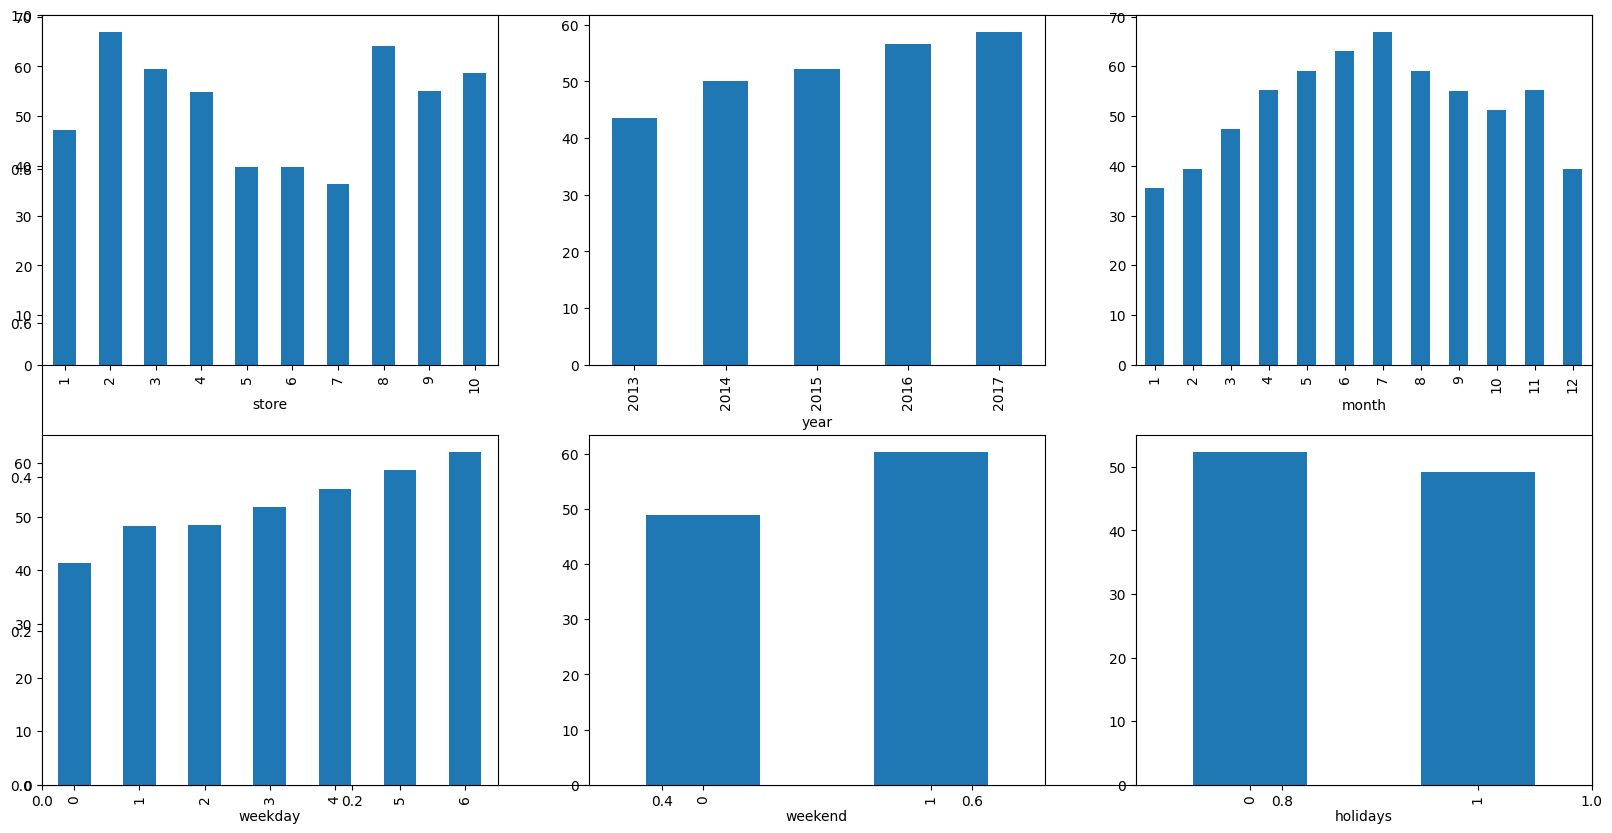

In [16]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
features = ['store', 'year', 'month', 'weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['sales'].plot.bar()
plt.show()


# for each feature it creates a bargraph
#groups the DataFrame by the current feature (col) and calculates the mean sales for each group.

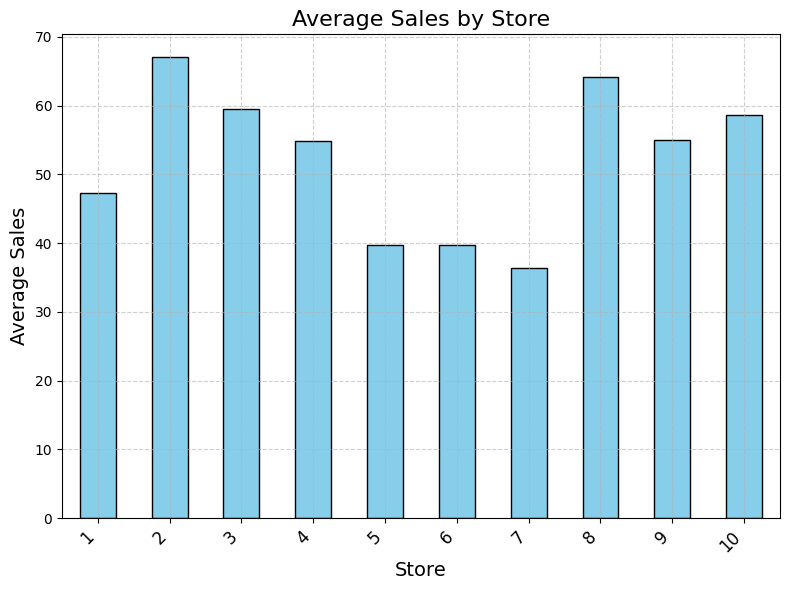

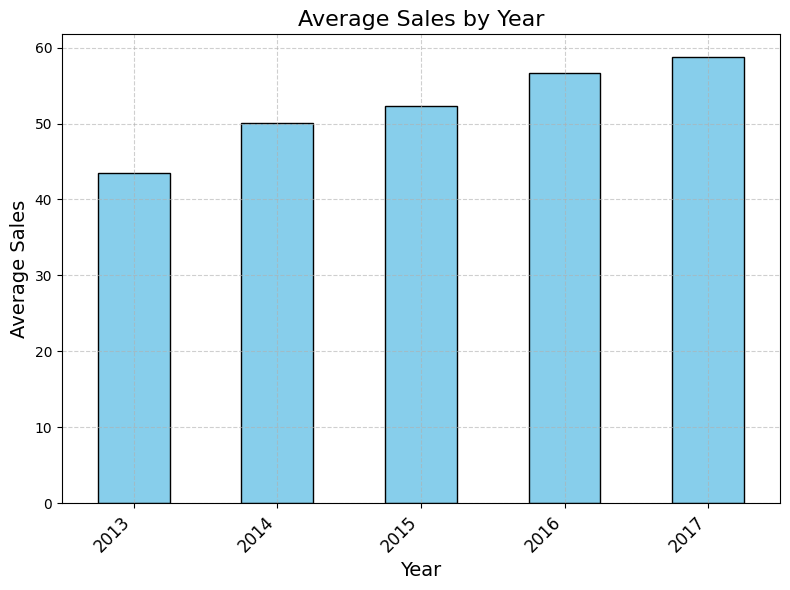

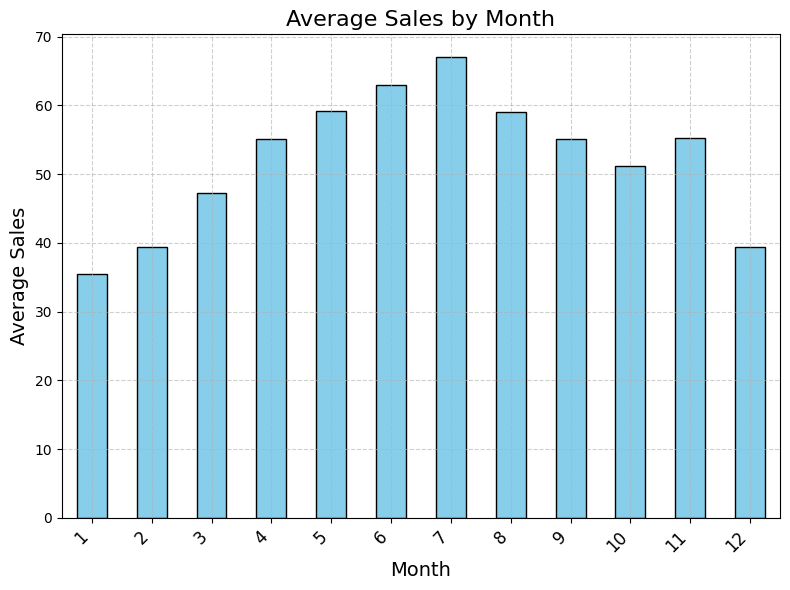

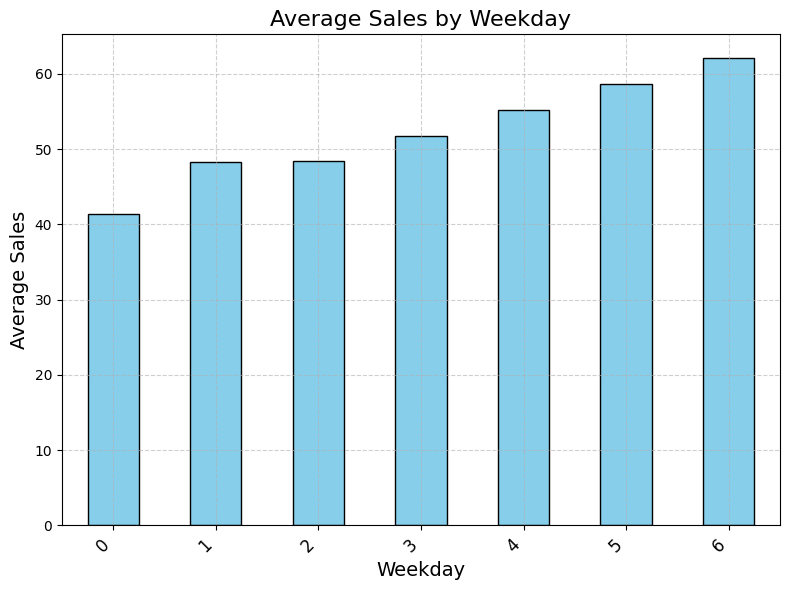

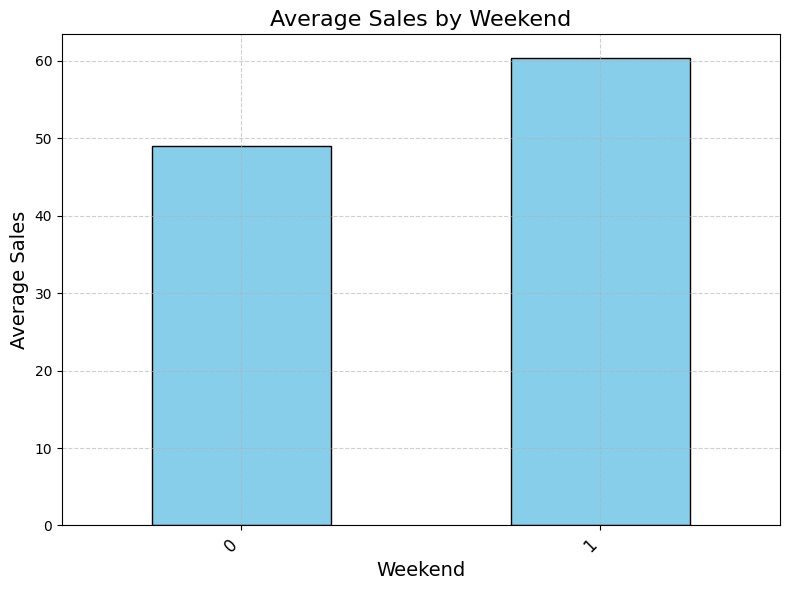

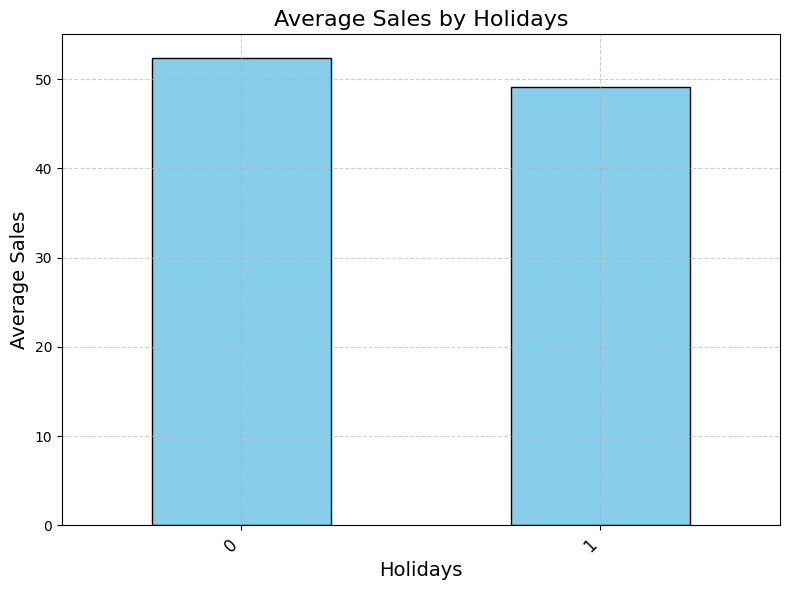

In [17]:
features = ['store', 'year', 'month', 'weekday', 'weekend', 'holidays']

# Iterate through the features and plot each in a separate figure
for col in features:
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))

    # Plotting the mean sales grouped by the current feature
    df.groupby(col).mean()['sales'].plot.bar(color='skyblue', edgecolor='black')

    # Add title and labels for better understanding
    plt.title(f'Average Sales by {col.capitalize()}', fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Average Sales', fontsize=14)

    # Rotate x-axis labels for clarity (especially if categorical data)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add a grid for easier visualization
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()
    plt.show()


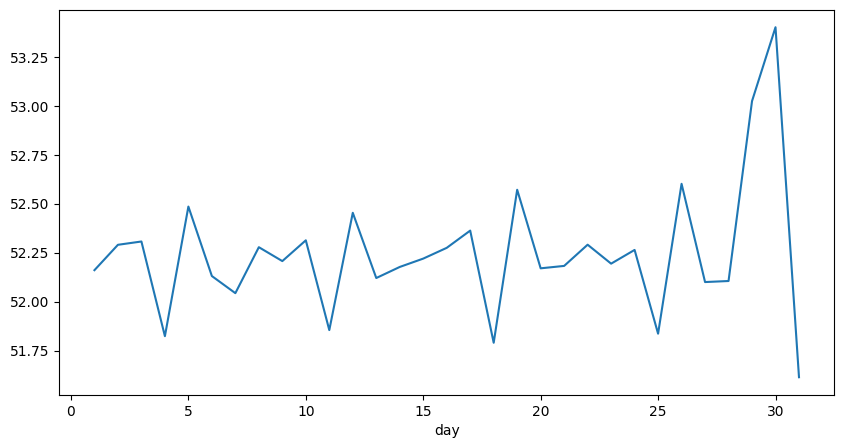

In [18]:
# check the variation of stock as the month closes to the end.

plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show()
#@  calculate the average sales for each day across the 5 years.

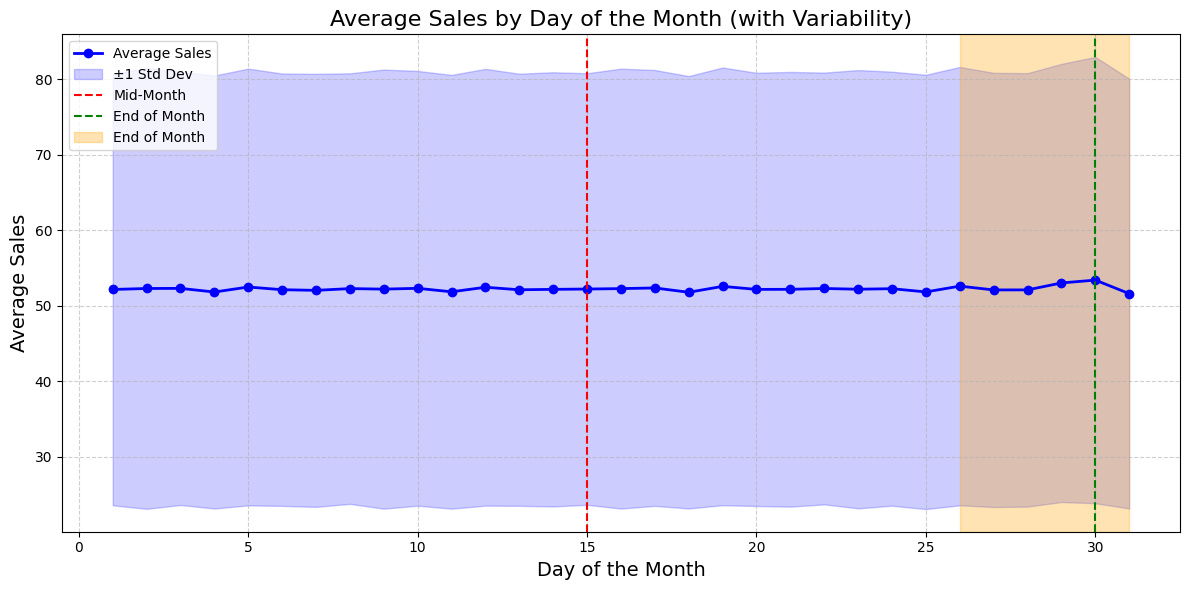

In [19]:
# Calculate mean and standard deviation of sales by day
mean_sales = df.groupby('day').mean()['sales']
std_sales = df.groupby('day').std()['sales']

plt.figure(figsize=(12, 6))  # Increase figure size for clarity

# Plot mean sales
plt.plot(mean_sales.index, mean_sales, marker='o', linestyle='-', color='b', label='Average Sales', linewidth=2)

# Plot shaded area for standard deviation (confidence interval)
plt.fill_between(mean_sales.index, mean_sales - std_sales, mean_sales + std_sales, color='blue', alpha=0.2, label='±1 Std Dev')

# Add vertical lines to mark significant points
plt.axvline(x=15, color='red', linestyle='--', label='Mid-Month')
plt.axvline(x=30, color='green', linestyle='--', label='End of Month')

# Highlight last 5 days (end of the month)
plt.axvspan(26, 31, color='orange', alpha=0.3, label='End of Month')

# Add title and labels
plt.title('Average Sales by Day of the Month (with Variability)', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

# Add legend for the plot
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


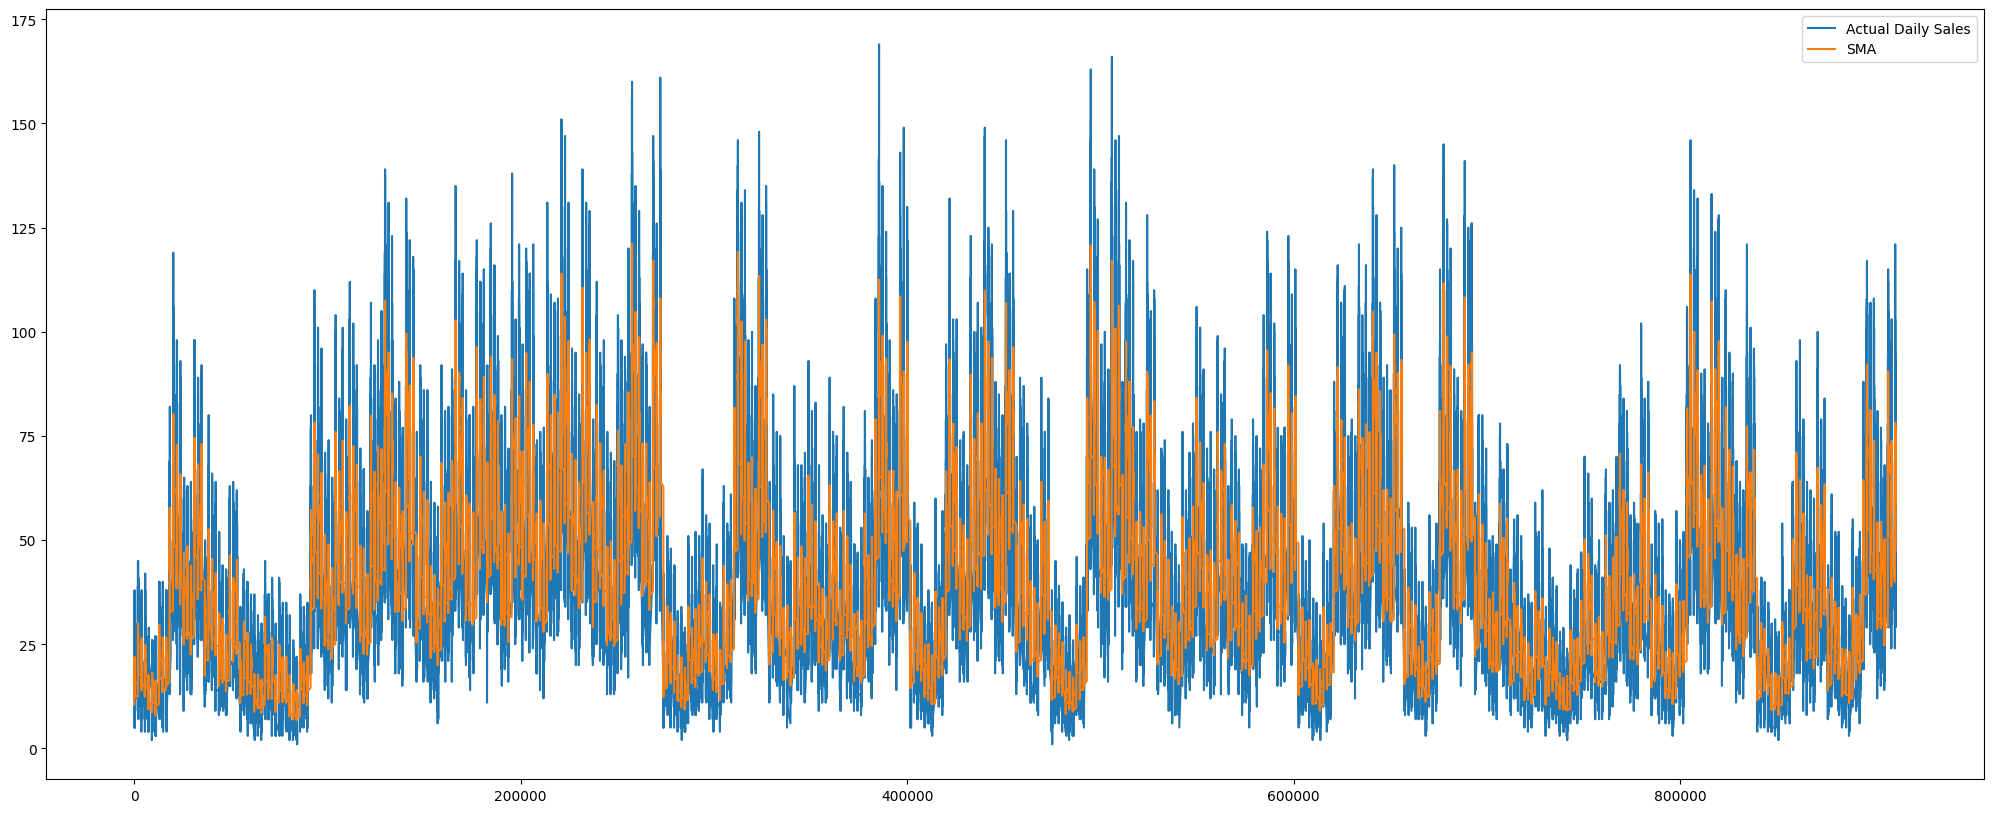

In [20]:
# draw the simple moving average for 30 days period. # for smoother values
# sma of all stores for 2013

plt.figure(figsize=(25, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['year']==2013] # for one year
windows = data['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['sales'].plot()
sma.plot()
plt.legend(['Actual Daily Sales','SMA'])
plt.show()
# calculates and visualizes the 30-day simple moving average (SMA) of sales data for the year 2013
 #Smoothing Fluctuations, Identifying Trends, Forecasting

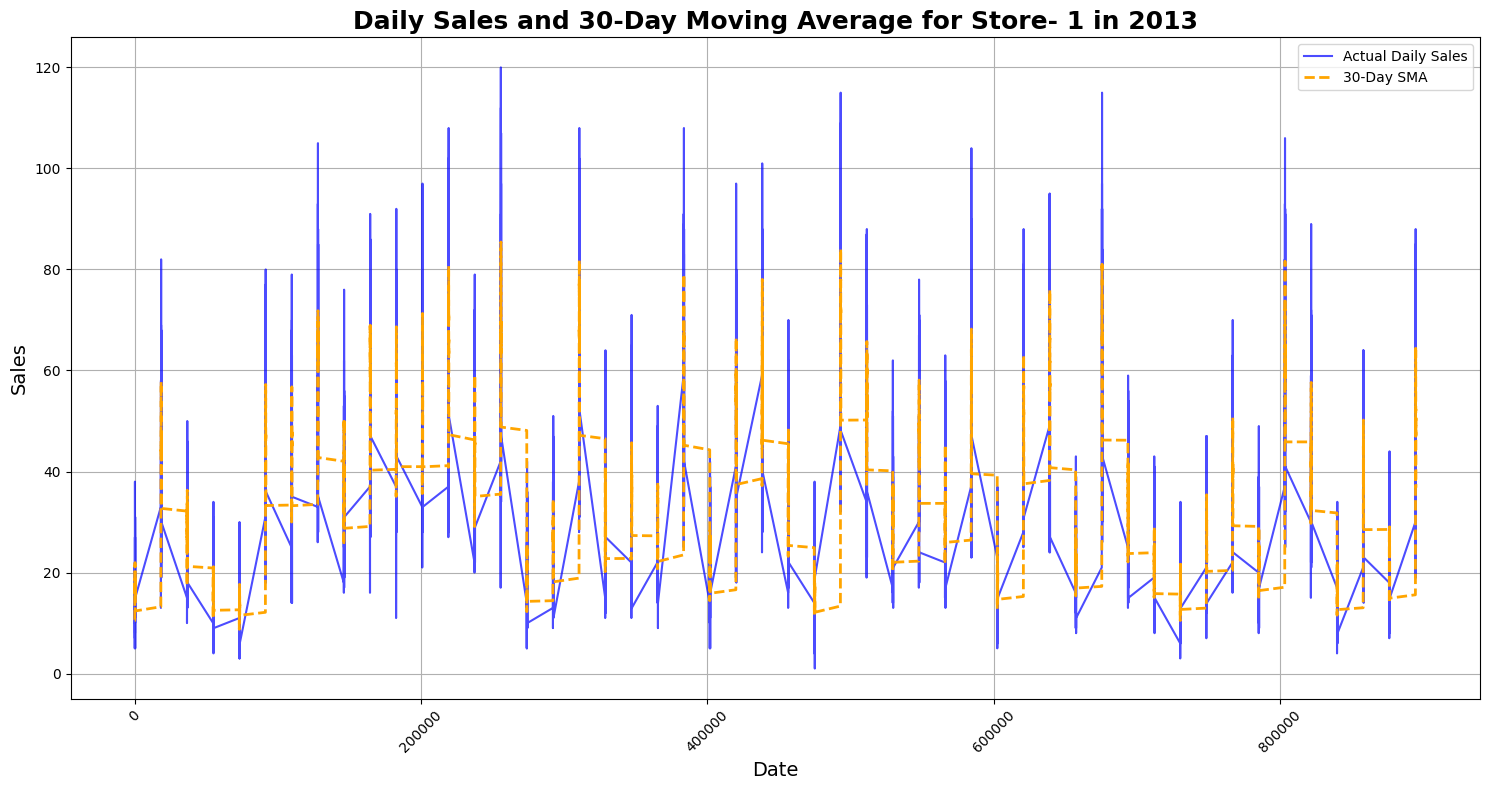

In [21]:
# sma for year 2013 for store-1
# consider 1-year for understanding seasonal patterns or specific events in 2013, focus on that year.


# Specify parameters for visualization
window_size = 30
store_number = 1  # Specify the store number you want to analyze

# again load it bcoz we eliminates the date column
df1 = pd.read_csv(path)
df1["year"]= parts[2].astype('int')
data1 = df1[(df1['year'] == 2013) & (df1['store'] == store_number)]

# Calculate Simple Moving Average
windows = data1['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(data1.index, data1['sales'], label='Actual Daily Sales', color='blue', alpha=0.7)
plt.plot(sma.index, sma, label='30-Day SMA', color='orange', linewidth=2, linestyle='--')

# Adding title and labels
plt.title(f'Daily Sales and 30-Day Moving Average for Store- {store_number} in 2013', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()


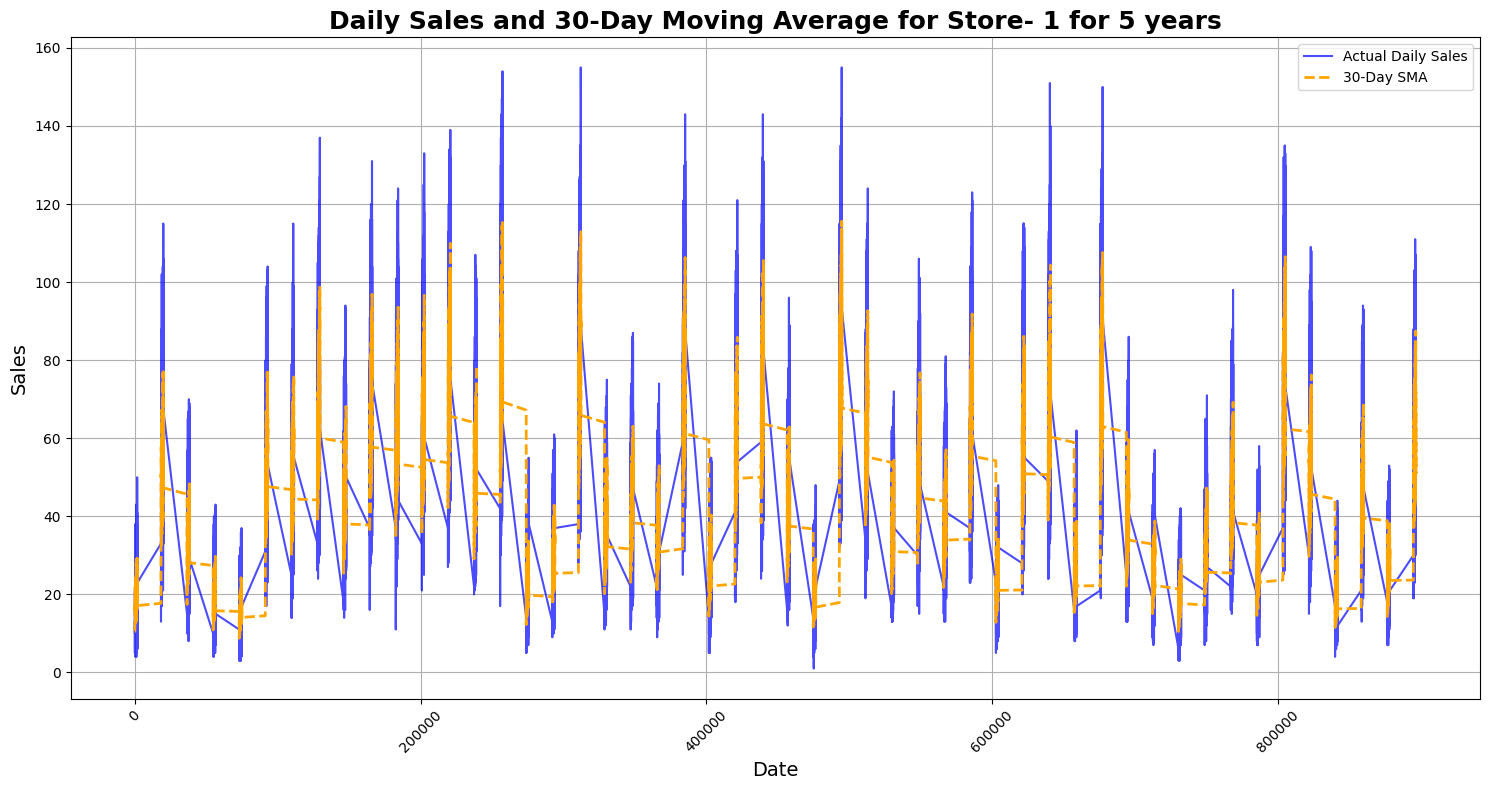

In [22]:
# sma for entire dataset for store-1
# consider entire dataset to identify broader trends and insights over time


window_size = 30
store_number = 1  # Specify the store number you want to analyze

# again load it bcoz we eliminates the date column
df2 = pd.read_csv(path)
data2 = df2[df2['store'] == store_number]

# Calculate Simple Moving Average
windows = data2['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(data2.index, data2['sales'], label='Actual Daily Sales', color='blue', alpha=0.7)
plt.plot(sma.index, sma, label='30-Day SMA', color='orange', linewidth=2, linestyle='--')

# Adding title and labels
plt.title(f'Daily Sales and 30-Day Moving Average for Store- {store_number} for 5 years', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()


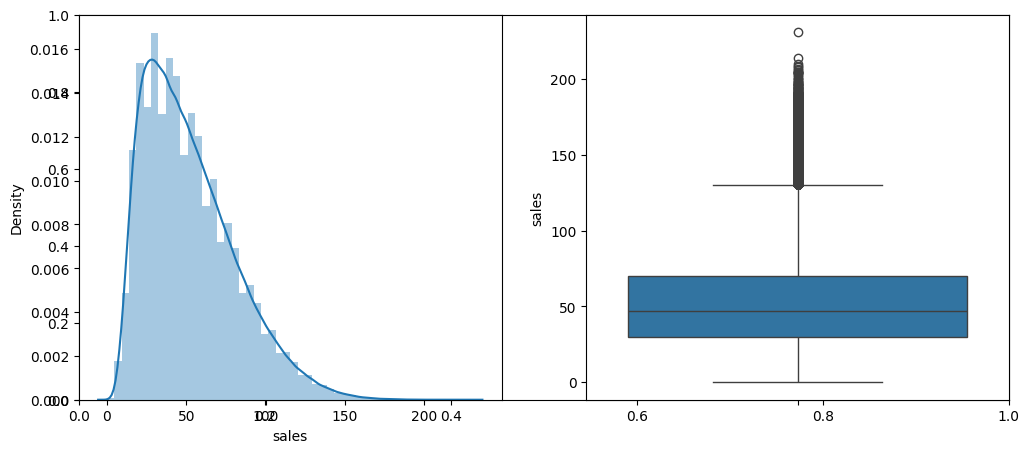

In [23]:
# As the data in the sales column is continuous let’s check the distribution of it
# and check whether there are some outliers in this column or not.

#This could indicate that the sales are stable and consistent, without frequent
# extreme fluctuations or outliers. It suggests a balanced demand for products over time.

# Distribution plot and Box plot for the target column
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df['sales'])

plt.subplot(1, 2, 2)
sb.boxplot(df['sales'])
plt.show()


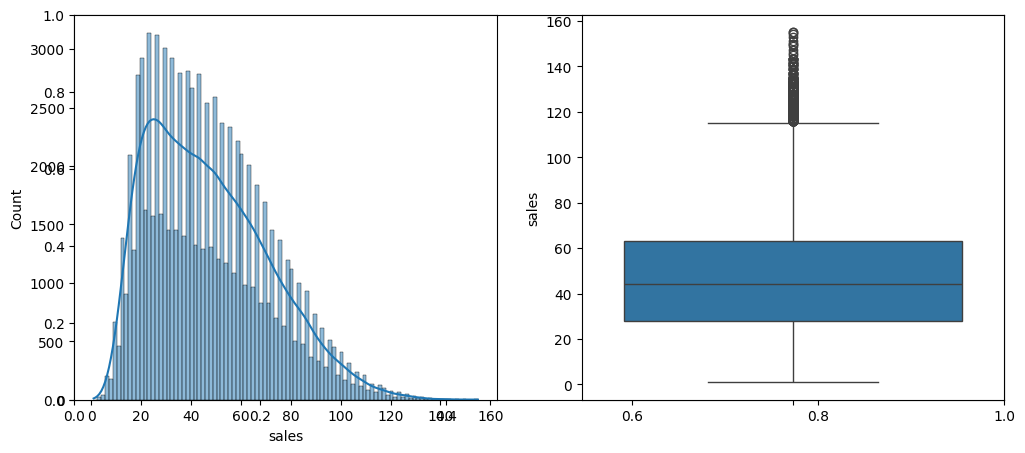

In [24]:
# Check only sales for Store 1 across all products and years

# Filter sales for Store 1 across all products and years
store_sales = df[df['store'] == 1]

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.histplot(store_sales['sales'], kde=True)  # Using histplot as distplot is deprecated

plt.subplot(1, 2, 2)
sb.boxplot(store_sales['sales'])
plt.show()


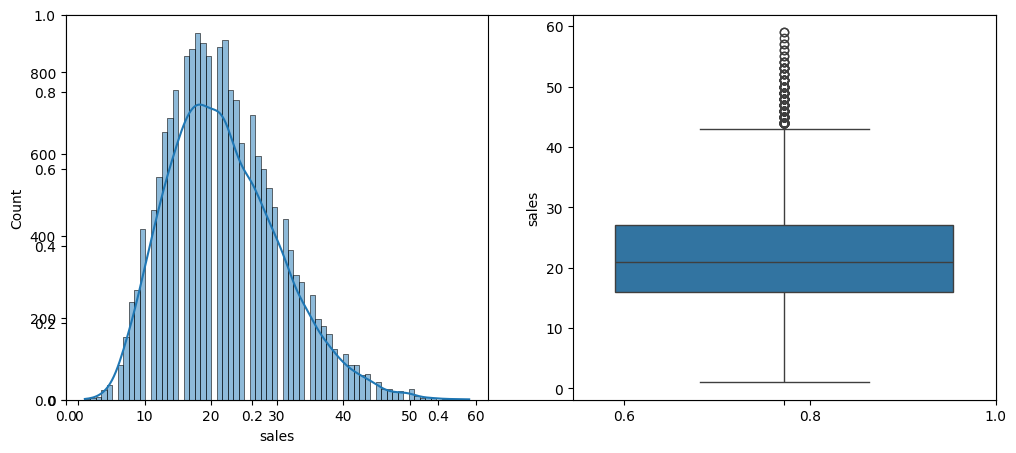

In [25]:
# Check only sales for Item 1 across all stores and years

# Filter sales for Item 1 across all stores and years
item_sales = df[df['item'] == 1]

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.histplot(item_sales['sales'], kde=True)

plt.subplot(1, 2, 2)
sb.boxplot(item_sales['sales'])
plt.show()



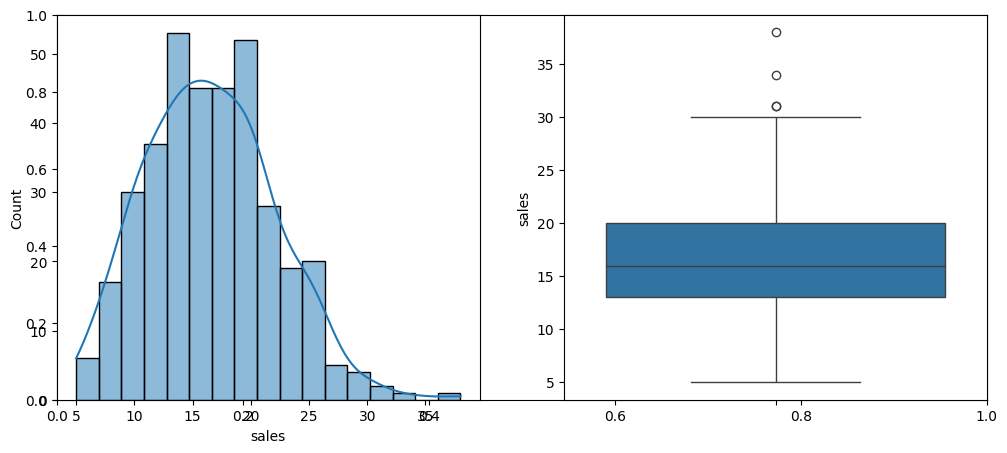

In [26]:
# Check only sales of Item 1 for Store 1 in the year 2013

df3 = pd.read_csv(path)
df3["year"]= parts[2].astype('int')

# Filter sales for Item 1 in Store 1 for the year 2013
filtered_sales = df3[(df3['store'] == 1) & (df3['item'] == 1) & (df3['year'] == 2013)]

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.histplot(filtered_sales['sales'], kde=True)

plt.subplot(1, 2, 2)
sb.boxplot(filtered_sales['sales'])
plt.show()


In [27]:
#As we observed earlier let’s remove the outliers which are present in the data.

df = df[df['sales']<140]

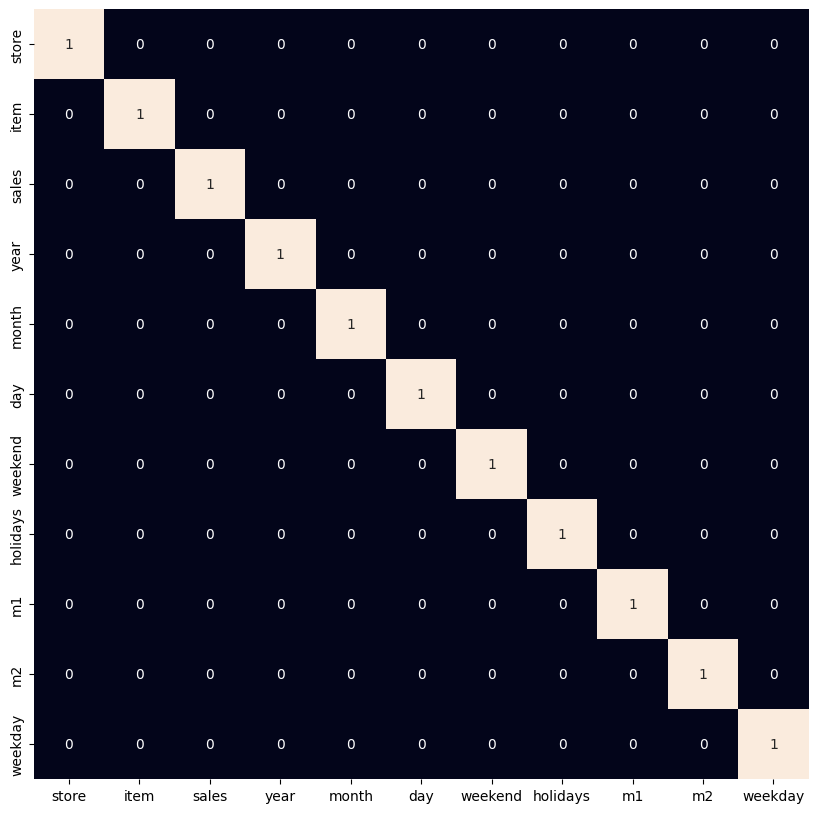

In [28]:
# Highly correlated features by heatmap

plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()
# when features are highly correlated, it can cause issues like multicollinearity, leading to
# instability in regression models. Identifying and removing redundant features can improve model performance.

# here, there is no linear relationship between features and target variable. so we use non linear regression model which is xgboost regression.

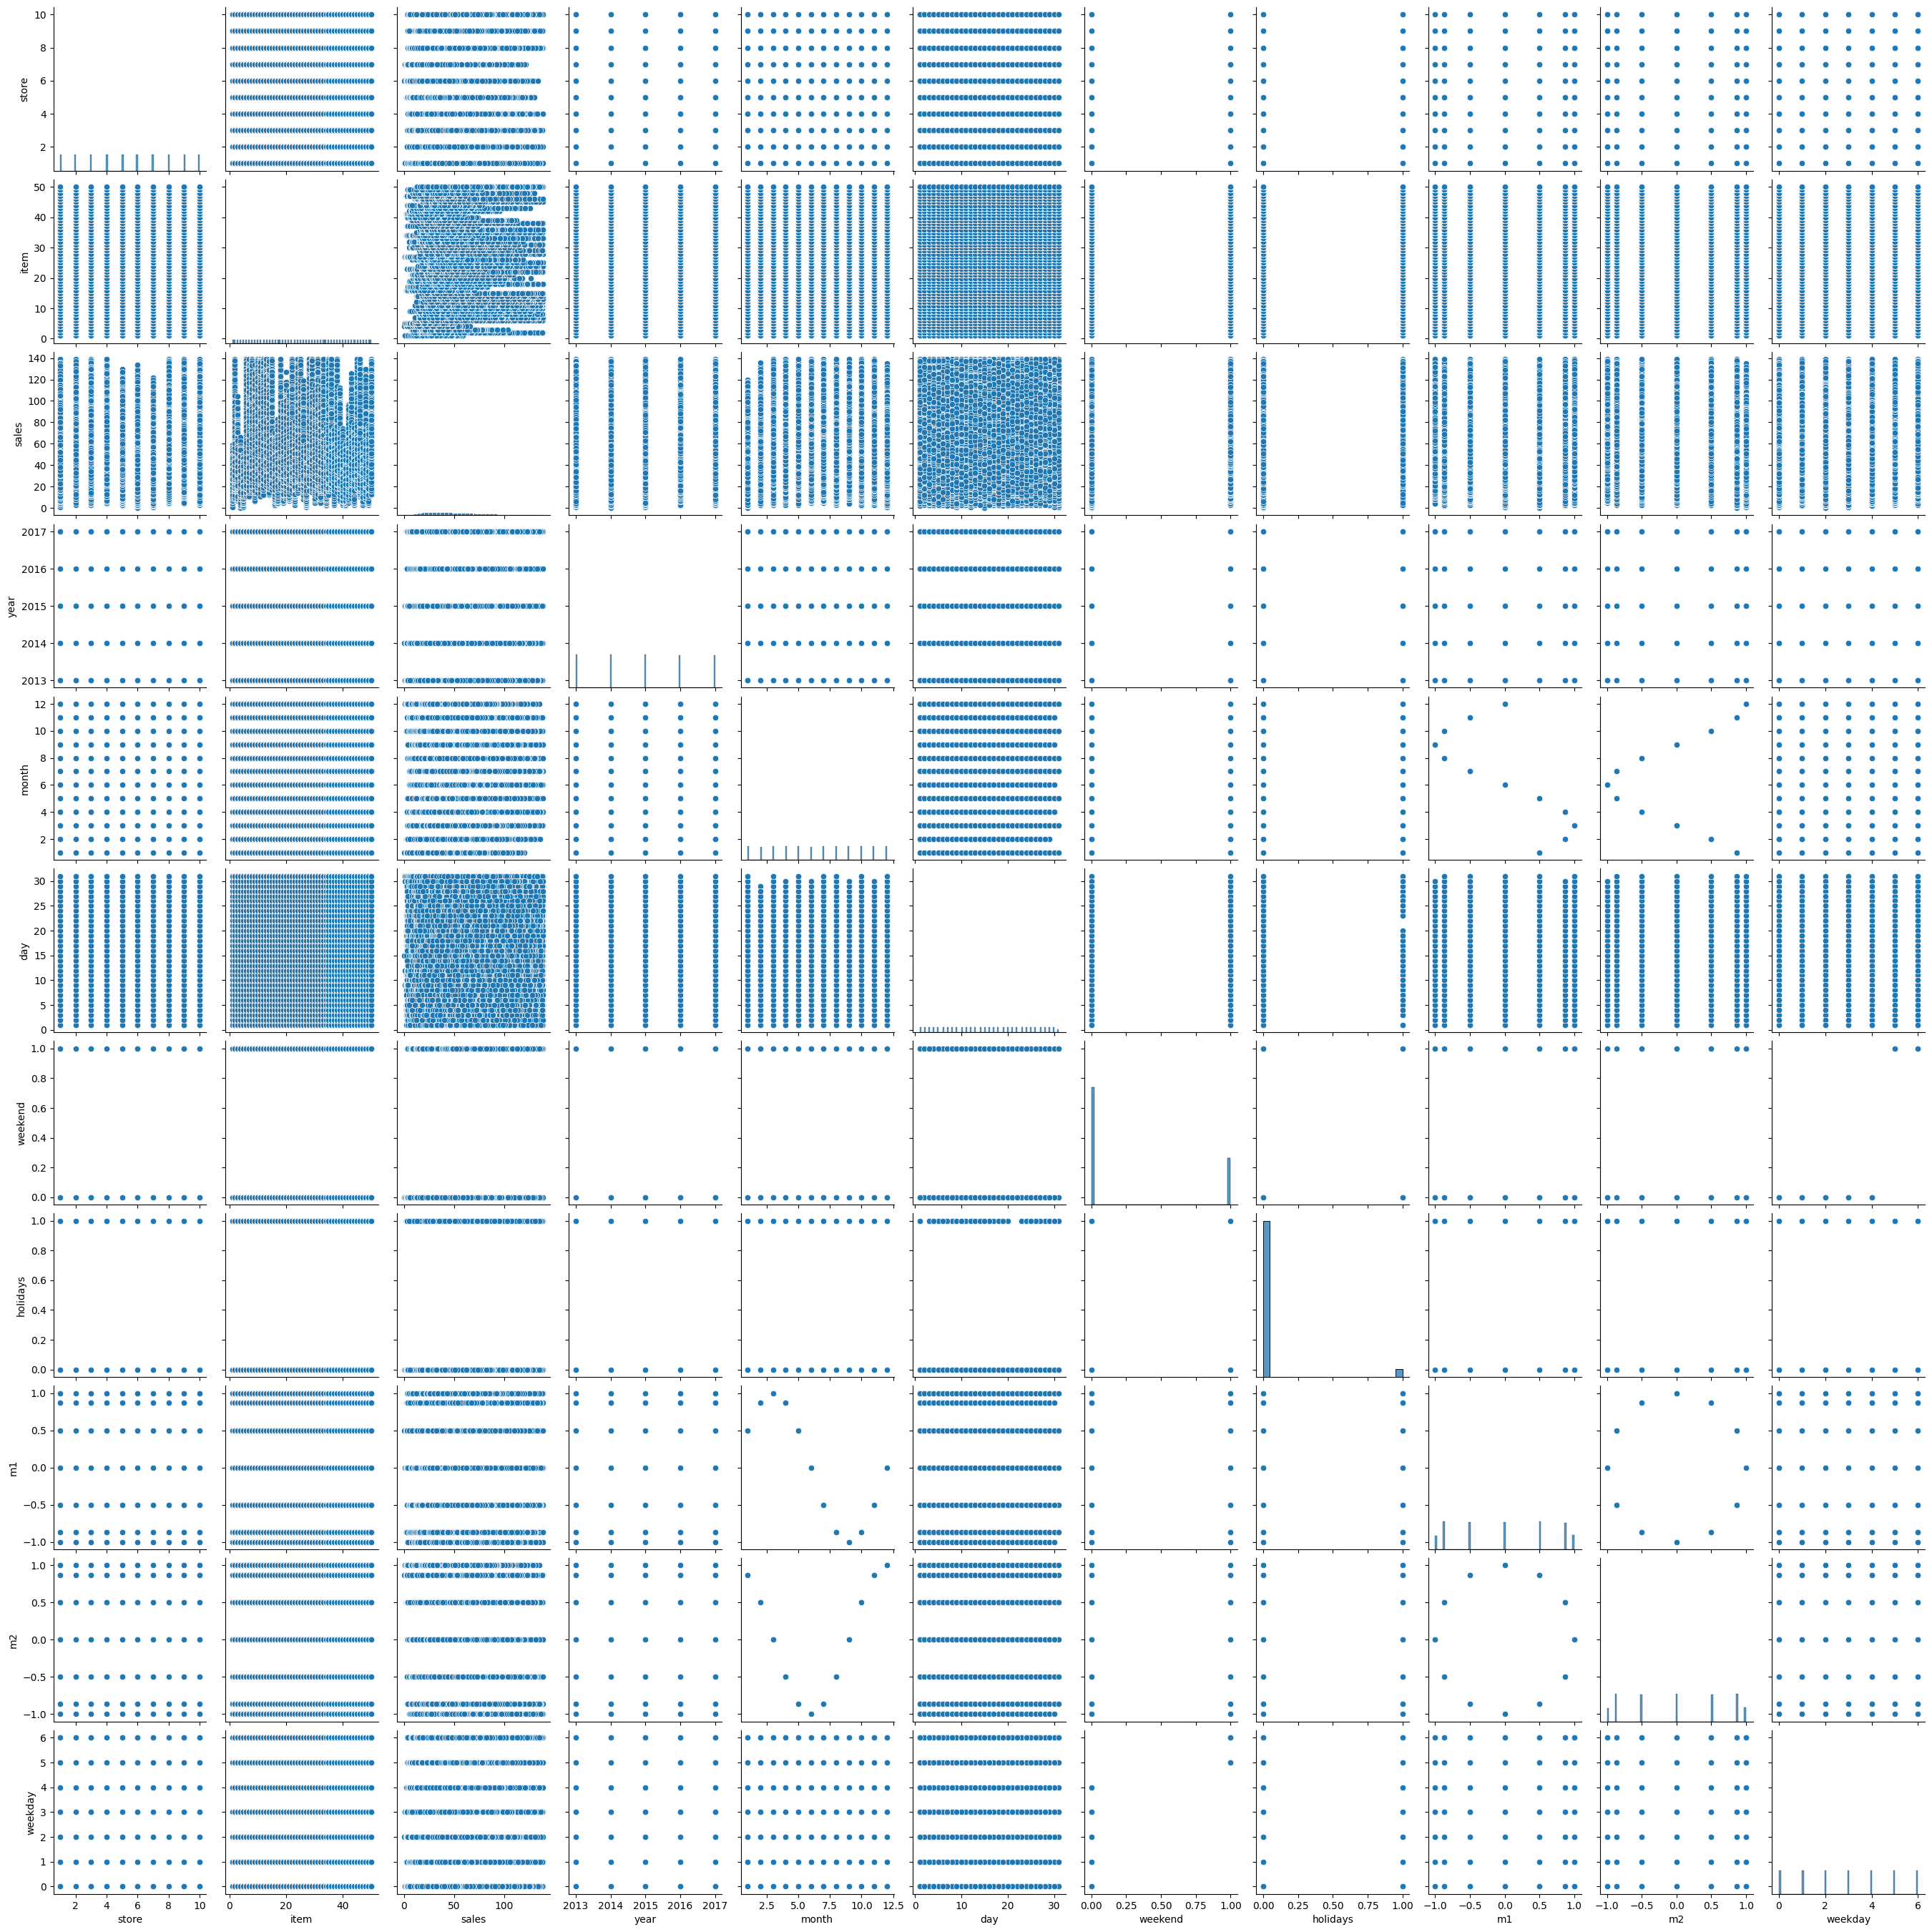

In [29]:
sb.pairplot(df) # there is no linear relation between any of features and sales target variable

In [30]:
df.head()

,store,item,sales,year,month,day,weekend,holidays,m1,m2,weekday
0,1,1,13,2013,1,1,0,0,0.5,0.866025,1
1,1,1,11,2013,1,2,0,0,0.5,0.866025,2
2,1,1,14,2013,1,3,0,0,0.5,0.866025,3
3,1,1,13,2013,1,4,0,0,0.5,0.866025,4
4,1,1,10,2013,1,5,1,1,0.5,0.866025,5


In [31]:
features = df.drop(['sales', 'year'], axis=1)
target = df['sales'].values

In [32]:
features.isnull().sum() # no null values

,0
store,0
item,0
month,0
day,0
weekend,0
holidays,0
m1,0
m2,0
weekday,0


In [33]:
# reindex the features  from 0
features = features.reset_index(drop=True)

In [34]:
# split into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [35]:
x_train.shape, x_test.shape

((725196, 9), (181299, 9))

In [36]:
# normlaize the features for stable and fast training
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
# save the scaler
import pickle
with open('/content/drive/MyDrive/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import scipy.stats as stats

# Define the model
model = XGBRegressor()

# Define the parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': stats.uniform(0.01, 0.2),  # Uniform distribution between 0.01 and 0.2
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': stats.uniform(0.5, 0.5),      # Between 0.5 and 1.0
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': [0, 1, 5],
    'reg_alpha': stats.uniform(0, 10),
    'reg_lambda': stats.uniform(1, 10),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    scoring='neg_mean_squared_error',  # Minimize MSE
    n_iter=50,                         # Number of random combinations to try
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Progress output
    random_state=42,
    n_jobs=-1                          # Use all available cores
)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.7852219872026998, 'gamma': 0, 'learning_rate': 0.20223440486986985, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 7.473201101373808, 'reg_lambda': 6.396921323890798, 'subsample': 0.7933755828319241}


In [41]:
import pandas as pd

# Extract results from the random search
results = random_search.cv_results_

# Get the parameter combinations and their scores
param_combinations = results['params']
mean_test_scores = results['mean_test_score']  # Mean cross-validated score (negative MSE here)

# Convert to MSE (remove the negative sign)
mse_scores = [-score for score in mean_test_scores]  # MSE is the negative of the stored values

# Combine parameters and scores into a DataFrame for better visualization
combinations_df = pd.DataFrame(param_combinations)
combinations_df['MSE'] = mse_scores

# Display the DataFrame
print(combinations_df)

# Optionally, save the results to a CSV file
# combinations_df.to_csv("random_search_results.csv", index=False)


    colsample_bytree  gamma  learning_rate  max_depth  n_estimators  \
0           0.687270      0       0.046687          7            50   
1           0.933088      5       0.014117          4           300   
2           0.591702      1       0.114951          6            50   
3           0.646072      5       0.101214          5           300   
4           0.803772      0       0.100100          4           300   
5           0.507983      1       0.146847          6           200   
6           0.695530      1       0.142504          4           100   
7           0.984792      1       0.099951          4           100   
8           0.785222      0       0.202234          7           300   
9           0.982628      0       0.038185          7            50   
10          0.646744      5       0.173092          3           300   
11          0.679233      0       0.192992          3           300   
12          0.834421      0       0.155921          5           200   
13    

In [42]:
combinations_df # row of index 8 has least mse. so we consider these parameters as best parameters

,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,reg_alpha,reg_lambda,subsample,MSE
0,0.687270,0,0.046687,7,50,1.560186,2.559945,0.529042,284.735969
1,0.933088,5,0.014117,4,300,8.324426,3.123391,0.590912,327.187987
2,0.591702,1,0.114951,6,50,2.912291,7.118529,0.569747,163.316942
3,0.646072,5,0.101214,5,300,5.142344,6.924146,0.523225,91.366265
4,0.803772,0,0.100100,4,300,9.422018,6.632882,0.692708,98.997419
5,0.507983,1,0.146847,6,200,6.099967,9.331949,0.586682,86.415313
6,0.695530,1,0.142504,4,100,5.200680,6.467103,0.592427,121.592422
7,0.984792,1,0.099951,4,100,9.266589,8.272720,0.663270,159.797531
8,0.785222,0,0.202234,7,300,7.473201,6.396921,0.793376,62.796399
9,0.982628,0,0.038185,7,50,0.156364,5.234015,0.697441,327.306283


In [43]:
# model training-> use xgboost regression
#Best_Parameters= {'colsample_bytree': 0.7852219872026998, 'gamma': 0, 'learning_rate': 0.20223440486986985, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 7.473201101373808, 'reg_lambda': 6.396921323890798, 'subsample': 0.7933755828319241}

from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree=0.7852219872026998, gamma= 0, learning_rate= 0.20223440486986985, max_depth= 7, n_estimators= 300, reg_alpha= 7.473201101373808, reg_lambda= 6.396921323890798, subsample= 0.7933755828319241)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7852219872026998, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.20223440486986985, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# test the model
target_pred=model.predict(x_test)

In [45]:
target_pred

array([13.518797, 25.910265, 61.970695, ..., 39.39859 , 39.50867 ,
       30.90267 ], dtype=float32)

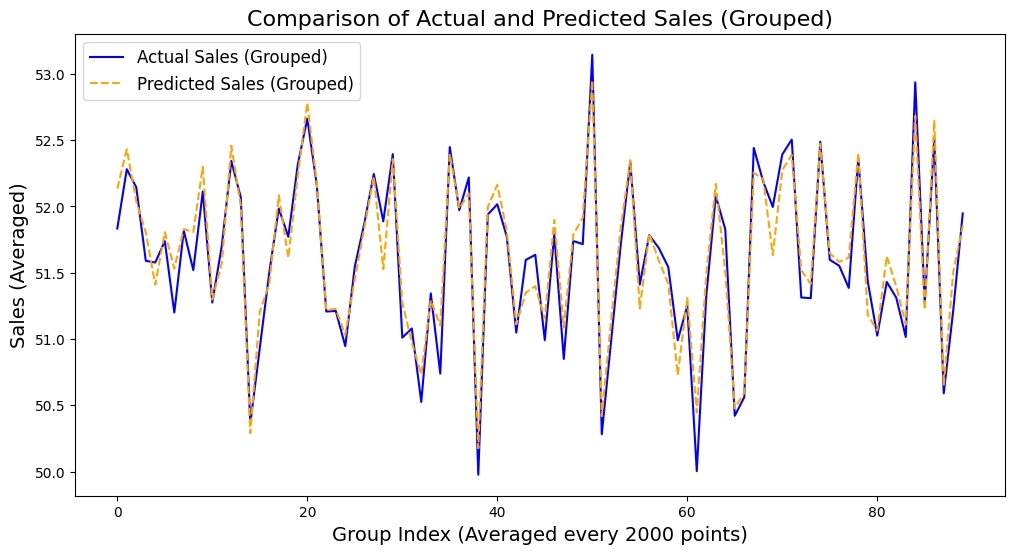

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grouping interval
group_size = 2000

# Group y_test and target_pred by averaging over the specified interval
y_test_grouped = y_test[:len(y_test)//group_size*group_size].reshape(-1, group_size).mean(axis=1)
target_pred_grouped = target_pred[:len(target_pred)//group_size*group_size].reshape(-1, group_size).mean(axis=1)

# Plot the grouped data
plt.figure(figsize=(12, 6))

# Plot the actual values (grouped)
plt.plot(y_test_grouped, label="Actual Sales (Grouped)", color="blue", linestyle="-")

# Plot the predicted values (grouped)
plt.plot(target_pred_grouped, label="Predicted Sales (Grouped)", color="orange", linestyle="--")

# Add title and labels
plt.title("Comparison of Actual and Predicted Sales (Grouped)", fontsize=16)
plt.xlabel("Group Index (Averaged every 2000 points)", fontsize=14)
plt.ylabel("Sales (Averaged)", fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()


In [47]:
# model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, target_pred)
mae = mean_absolute_error(y_test, target_pred)
r2 = r2_score(y_test, target_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 62.5119229510955
Mean Absolute Error: 6.06330626979921
R-squared: 0.9179232120513916


In [48]:
#save the model

import pickle
# Save the model to a file
with open('/content/drive/MyDrive/ICPS_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully!")

Model saved successfully!


In [49]:
# Load the model from the file
import pickle
with open('/content/drive/MyDrive/ICPS_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [50]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime
import holidays
import pickle

class SalesPredictor:
    def __init__(self, scaler_path='/content/drive/MyDrive/scaler.pkl', model_path='/content/drive/MyDrive/ICPS_model.pkl'):
        # Load the scaler and model during initialization
        self.scaler = self.load_pickle(scaler_path)
        self.model = self.load_pickle(model_path)

    def load_pickle(self, path):
        with open(path, 'rb') as file:
            return pickle.load(file)

    def preprocess_data(self, df):
        # Split the 'date' column into separate 'year', 'month', and 'day' columns
        parts = df["date"].str.split("-", n=3, expand=True)
        df["year"] = parts[2].astype('int')
        df["month"] = parts[1].astype('int')
        df["day"] = parts[0].astype('int')

        # Adding features: weekend, holidays, and cyclical transformations
        df['weekend'] = df.apply(lambda x: self.weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
        df['holidays'] = df['date'].apply(self.is_holiday)

        # Cyclical feature transformation for month
        df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))  # Sine transformation for cyclicality
        df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))  # Cosine transformation for cyclicality

        # Adding weekday feature
        df['weekday'] = df.apply(lambda x: self.which_day(x['year'], x['month'], x['day']), axis=1)

        # Drop 'date' and 'year' columns as they're no longer needed for prediction
        df.drop(['date', 'year'], axis=1, inplace=True)

        # Reset index for consistent feature ordering
        return df.reset_index(drop=True)

    def weekend_or_weekday(self, year, month, day):
        d = datetime(year, month, day)
        return 1 if d.weekday() > 4 else 0

    def is_holiday(self, x):
        india_holidays = holidays.country_holidays('IN')
        return 1 if india_holidays.get(x) else 0

    def which_day(self, year, month, day):
        d = datetime(year, month, day)
        return d.weekday()

    def predict(self, df):
        # Preprocess the data
        features = self.preprocess_data(df)

        # Scale the features
        features_scaled = self.scaler.transform(features)

        # Make predictions using the trained model
        prediction = self.model.predict(features_scaled)
        prediction = np.round(prediction)
        return prediction

In [51]:
data = {
    'date': ['01-01-2013', '02-01-2013', '03-01-2013', '04-01-2013', '05-01-2013'],
    'store': [1, 1, 1, 1, 1],
    'item': [1, 1, 1, 1, 1]
}

import pandas as pd
df = pd.DataFrame(data)

SP = SalesPredictor()
prediction = SP.predict(df)
print(prediction)

[ 8.  9.  9. 13. 10.]


In [61]:
# Creating a better interface using ipywidgets

import ipywidgets as widgets
from ipywidgets import interactive
from datetime import datetime
import numpy as np
import pandas as pd

sales_predictor = SalesPredictor()

date_picker = widgets.DatePicker(description='Pick a Date', disabled=False)
item_input = widgets.IntText(value=1, description='Item ID:', min=1, max=50, disabled=False)
store_input = widgets.IntText(value=1, description='Store ID:', min=1, max=10, disabled=False)

output = widgets.Output()

def on_button_click(date, item, store):
    if not (1 <= item <= 50):
        with output:
            output.clear_output(wait=True)
            print("Item ID must be between 1 and 50.")
        return
    if not (1 <= store <= 10):
        with output:
            output.clear_output(wait=True)
            print("Store ID must be between 1 and 10.")
        return

    date_str = date.strftime('%d-%m-%Y')
    input_data = pd.DataFrame({'date': [date_str], 'store': [store], 'item': [item]})

    # Make prediction
    prediction = sales_predictor.predict(input_data)
    with output:
        output.clear_output(wait=True)
        print(f"Prediction: {prediction[0]}")

predict_button = widgets.Button(description="Predict Sales")
predict_button.on_click(lambda x: on_button_click(date_picker.value, item_input.value, store_input.value))
widgets.VBox([date_picker, item_input, store_input, predict_button, output])

In [53]:
stores_range = 10
items_range = 50
month_range ={1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}

In [54]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to predict total sales for a specific month, year, store, and item
def predict_monthly_sales(year, month, store_id, item_id, predictor):
    month_days = month_range[month]
    if month == 2 and ((year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)):  # Leap year
        month_days = 29

    # Create a DataFrame for the month
    data = {
        'date': [f"{day:02d}-{month:02d}-{year}" for day in range(1, month_days + 1)],
        'store': [store_id] * month_days,
        'item': [item_id] * month_days
    }
    df = pd.DataFrame(data)
    daily_sales = predictor.predict(df)
    return daily_sales.sum()

# Define the predictor instance (assuming model and scaler paths are correct)
predictor = SalesPredictor(scaler_path='/content/drive/MyDrive/scaler.pkl', model_path='/content/drive/MyDrive/ICPS_model.pkl')

# Define interactive widgets
year_input = widgets.IntText(value=2024, description='Year:', min=2013, max=2025)
month_input = widgets.Dropdown(
    options=[(f"{i:02d} ({month_range[i]} days)", i) for i in range(1, 13)],
    value=1,
    description='Month:'
)
store_input = widgets.IntSlider(value=1, min=1, max=stores_range, step=1, description='Store ID:')
item_input = widgets.IntSlider(value=1, min=1, max=items_range, step=1, description='Item ID:')
output_area = widgets.Output()

# Function to handle predictions
def on_submit(_):
    with output_area:
        clear_output()
        year = year_input.value
        month = month_input.value
        store_id = store_input.value
        item_id = item_input.value

        # Predict total sales
        total_sales = predict_monthly_sales(year, month, store_id, item_id, predictor)
        print(f"Total sales for Store {store_id}, Item {item_id} in {month}/{year}: {total_sales}")

# Button to trigger prediction
submit_button = widgets.Button(description="Predict Sales")
submit_button.on_click(on_submit)

# Display the widgets
display(widgets.VBox([year_input, month_input, store_input, item_input, submit_button, output_area]))


In [64]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to get the top 10 items in demand for a given month, year, and store
def get_top_10_items(year, month, store_id, predictor):
    month_days = month_range[month]
    if month == 2 and ((year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)):  # Leap year
        month_days = 29

    # List to store item sales
    item_sales = []

    # Iterate through all items in the range
    for item_id in range(1, items_range + 1):
        # Create a DataFrame for the item
        data = {
            'date': [f"{day:02d}-{month:02d}-{year}" for day in range(1, month_days + 1)],
            'store': [store_id] * month_days,
            'item': [item_id] * month_days
        }
        df = pd.DataFrame(data)

        # Predict daily sales
        daily_sales = predictor.predict(df)
        total_sales = daily_sales.sum()
        item_sales.append((item_id, total_sales))

    # Convert to DataFrame and get top 10 items
    item_sales_df = pd.DataFrame(item_sales, columns=['Item ID', 'Total_Sales'])
    top_10_items = item_sales_df.sort_values(by='Total_Sales', ascending=False).head(10)

    return top_10_items

# Define predictor instance
predictor = SalesPredictor(scaler_path='/content/drive/MyDrive/scaler.pkl', model_path='/content/drive/MyDrive/ICPS_model.pkl')

# Define interactive widgets
year_input = widgets.IntText(value=2024, description='Year:', min=2013, max=2025)
month_input = widgets.Dropdown(
    options=[(f"{i:02d} ({month_range[i]} days)", i) for i in range(1, 13)],
    value=1,
    description='Month:'
)
store_input = widgets.IntSlider(value=1, min=1, max=stores_range, step=1, description='Store ID:')
output_area = widgets.Output()

# Function to handle predictions
def on_submit(_):
    with output_area:
        clear_output()
        year = year_input.value
        month = month_input.value
        store_id = store_input.value

        # Get top 10 items
        top_10_items = get_top_10_items(year, month, store_id, predictor)
        print(f"Top 10 items in demand for Store {store_id} in {month}/{year}:\n")
        print(top_10_items)

# Button to trigger prediction
submit_button = widgets.Button(description="Get Top 10 Items")
submit_button.on_click(on_submit)

# Display the widgets
display(widgets.VBox([year_input, month_input, store_input, submit_button, output_area]))

In [63]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to get the top 50 items in demand for a given month, year, and store
def get_top_50_items(year, month, store_id, predictor):
    month_days = month_range[month]
    if month == 2 and ((year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)):  # Leap year
        month_days = 29

    # List to store item sales
    item_sales = []

    # Iterate through all items in the range
    for item_id in range(1, items_range + 1):
        # Create a DataFrame for the item
        data = {
            'date': [f"{day:02d}-{month:02d}-{year}" for day in range(1, month_days + 1)],
            'store': [store_id] * month_days,
            'item': [item_id] * month_days
        }
        df = pd.DataFrame(data)

        # Predict daily sales
        daily_sales = predictor.predict(df)
        total_sales = daily_sales.sum()
        item_sales.append((item_id, total_sales))

    # Convert to DataFrame and get top 50 items
    item_sales_df = pd.DataFrame(item_sales, columns=['Item ID', 'Total_Sales'])
    top_50_items = item_sales_df.sort_values(by='Total_Sales', ascending=False).head(50)

    return top_50_items

# Define predictor instance
predictor = SalesPredictor(scaler_path='/content/drive/MyDrive/scaler.pkl', model_path='/content/drive/MyDrive/ICPS_model.pkl')

# Define interactive widgets
year_input = widgets.IntText(value=2024, description='Year:', min=2013, max=2025)
month_input = widgets.Dropdown(
    options=[(f"{i:02d} ({month_range[i]} days)", i) for i in range(1, 13)],
    value=1,
    description='Month:'
)
store_input = widgets.IntSlider(value=1, min=1, max=stores_range, step=1, description='Store ID:')
output_area = widgets.Output()

# Function to handle predictions
def on_submit(_):
    with output_area:
        clear_output()
        year = year_input.value
        month = month_input.value
        store_id = store_input.value

        # Get top 50 items
        top_50_items = get_top_50_items(year, month, store_id, predictor)
        print(f"Top 50 items in demand for Store {store_id} in {month}/{year}:\n")
        print(top_50_items)

# Button to trigger prediction
submit_button = widgets.Button(description="Show Demand")
submit_button.on_click(on_submit)

# Display the widgets
display(widgets.VBox([year_input, month_input, store_input, submit_button, output_area]))